# **MID-TERM PRACTICAL**

**Ques 1 : Write a python programme to visualize time series data from the Time Series data liberary and explores it pattern , trend and sesonality**

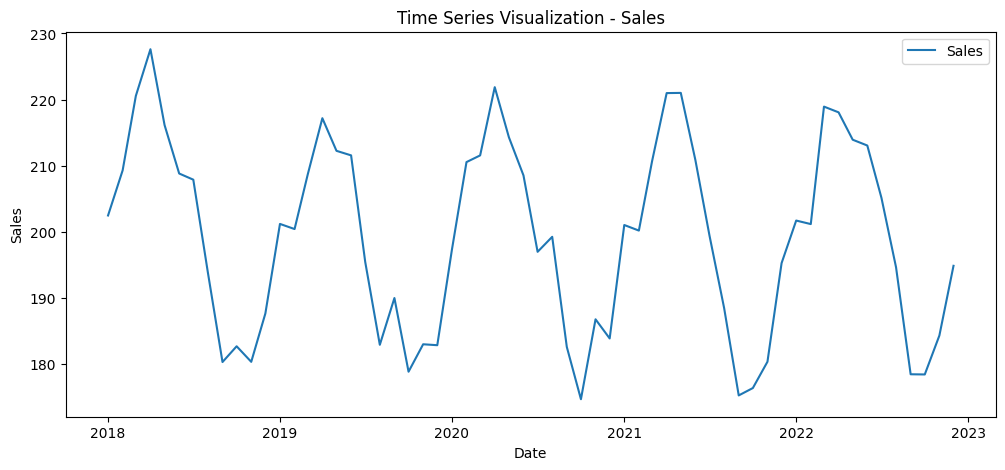

In [10]:
# data visualization 

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("practical code/synthetic_sales.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(12,5))
plt.plot(df['Sales'], label="Sales")
plt.title("Time Series Visualization - Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

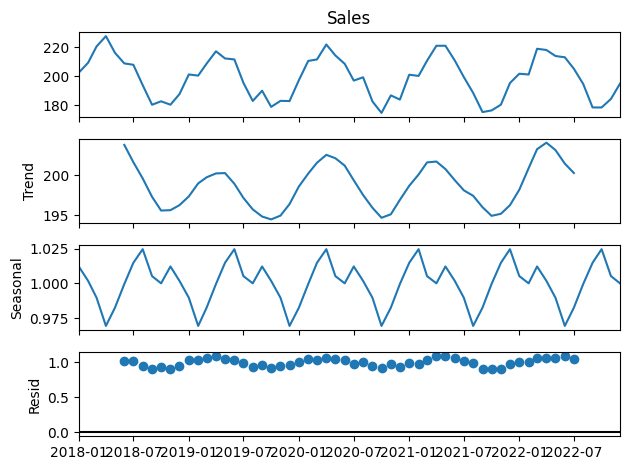

In [11]:
# TREND , Seasonality , Residal

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Sales'], model='multiplicative', period=10)
decomposition.plot()
plt.show()


**Ques2 : Write a progamme to import time series data from excel file nalyze all the fundamental components of the series (trend , seasonality , residuals )and applies a suitable forcasting model to demostrate a complete forcasting case study**

/home/pawan/miniconda3/envs/academics/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/pawan/miniconda3/envs/academics/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/pawan/miniconda3/envs/academics/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


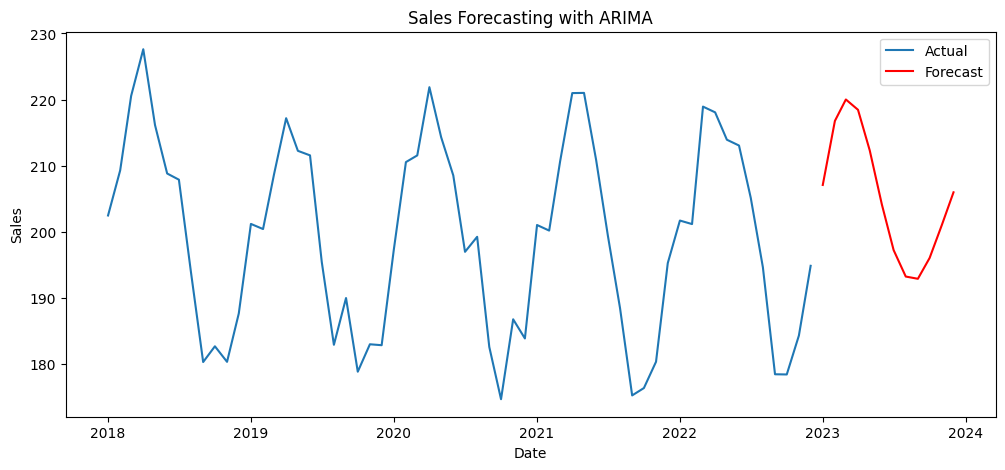

In [12]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(5,1,0))
fit = model.fit()

forecast = fit.forecast(12)

plt.figure(figsize=(12,5))
plt.plot(df['Sales'], label="Actual")
plt.plot(forecast, label="Forecast", color='red')
plt.title("Sales Forecasting with ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

**Ques3 : Devlop a python program to simulate d visualise the working of two time series models :**  
1 . the simple moving average model  
2 . the autoregressive .   for each model , provide an institution explanation of its underelying oncepts along with the implementation

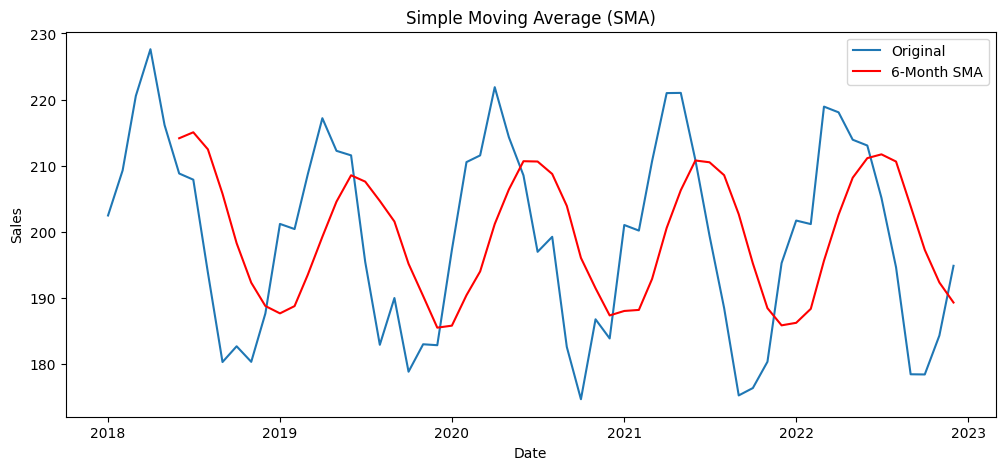

In [13]:
from statsmodels.tsa.ar_model import AutoReg

df['SMA_6'] = df['Sales'].rolling(window=6).mean()

plt.figure(figsize=(12,5))
plt.plot(df['Sales'], label="Original")
plt.plot(df['SMA_6'], label="6-Month SMA", color='red')
plt.title("Simple Moving Average (SMA)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


/home/pawan/miniconda3/envs/academics/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/pawan/miniconda3/envs/academics/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


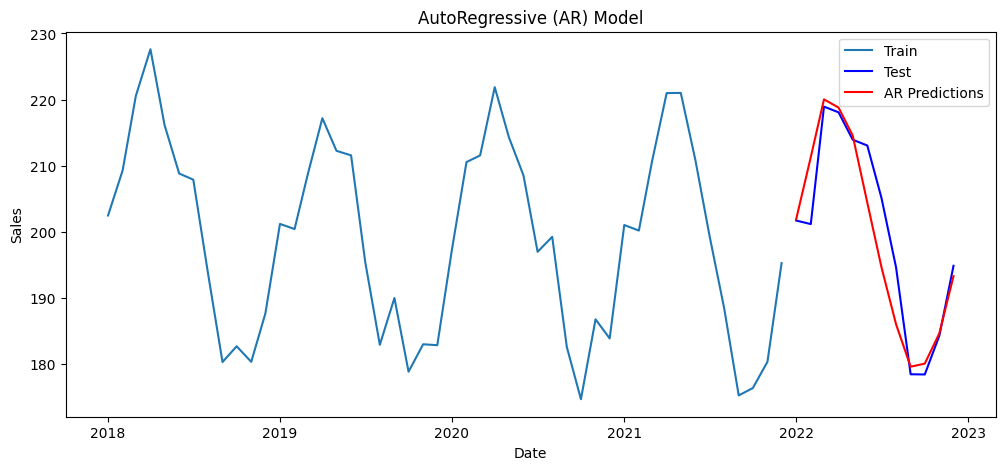

In [14]:
train = df['Sales'][:-12]
test = df['Sales'][-12:]

ar_model = AutoReg(train, lags=6).fit()
pred = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color='blue')
plt.plot(test.index, pred, label="AR Predictions", color='red')
plt.title("AutoRegressive (AR) Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()